## **SHAPEAI - DATA SCIENTIST TRAINING & INTERNSHIP**

### **Author: Midhir Nambiar**

### **Task: US elections Sentiment Analysis**

Sentiment Analysis: It is the process of using natural language processing, text analysis, and statistics to analyse customer sentiments. Customer sentiments can be found in tweets, comments, reviews or other places where people mention your brand. Sentiment Analysis is the domain of understanding these emotions with the help of a software, and it's a must understanding topic for developers and business leaders in a modern workplace.

Outline: 

1. Importing Libraries
2. Data Analysis
3. Exploratory Data Analysis
4. Sentiment Analysis


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import wordcloud
from textblob import TextBlob
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Data Analysis**

In [2]:
trump = pd.read_csv('/content/hashtag_donaldtrump.csv', lineterminator='\n')
biden = pd.read_csv('/content/hashtag_joebiden.csv', lineterminator='\n')

In [3]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [4]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [5]:
print(trump.shape)
print(biden.shape)

(725654, 21)
(499828, 21)


In [6]:
print(trump.info())
print(biden.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725654 entries, 0 to 725653
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            725654 non-null  object 
 1   tweet_id              725654 non-null  float64
 2   tweet                 725654 non-null  object 
 3   likes                 725654 non-null  float64
 4   retweet_count         725654 non-null  float64
 5   source                724897 non-null  object 
 6   user_id               725654 non-null  float64
 7   user_name             725639 non-null  object 
 8   user_screen_name      725654 non-null  object 
 9   user_description      651481 non-null  object 
 10  user_join_date        725654 non-null  object 
 11  user_followers_count  725654 non-null  float64
 12  user_location         505267 non-null  object 
 13  lat                   342071 non-null  float64
 14  long                  342071 non-null  float64
 15  

In [7]:
# Concatenating both the dataframes for easier analysis
# Adding a flag
trump['Candidate']='Trump'
biden['Candidate'] ='Biden'
data_mixed = pd.concat([trump,biden])
data_mixed.sort_values(by='created_at')
data_mixed

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499823,2020-11-05 23:59:45,1.324502e+18,Votes get “whittled down”? Counting of mail i...,0.0,0.0,Twitter for iPad,8.059161e+08,Sherry Slater,NS_Slater,"Mom of 4 great kids - hard working, proud Demo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:37.074759,Biden
499824,2020-11-05 23:59:47,1.324502e+18,CONTINÚAN SALIENDO LAS PRUEBAS DEL FRAUDE ELEC...,1.0,1.0,Twitter for iPhone,4.805877e+08,Portero Mexico,PorteroMexico,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:36.811037,Biden
499825,2020-11-05 23:59:50,1.324502e+18,#ElectionResults2020 #USElection #ThursdayThou...,1.0,0.0,Twitter for iPhone,2.265816e+09,VOTE EARLY! ✊🏿✊🏾✊🏽✊🏼✊🏻🏳️‍🌈🇺🇸🗽🌊Biden2020,_lolo173,If my content resonates—follow me. Resist •Pro...,...,Earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:37.040510,Biden
499826,2020-11-05 23:59:54,1.324502e+18,I wonder who they’re voting for 🤔... - #fyp #f...,0.0,0.0,Instagram,8.317075e+17,NathanKTV,NathanKTV_,💁🏻‍♂️: IG 👉 NathanKTV \n🎥: 👇🏼\nhttps://t.co/o...,...,"Beverly Hills, CA",34.069650,-118.396306,NaN,United States of America,North America,California,CA,2020-11-06 10:04:36.975515,Biden


**Exploratory Data Analysis**

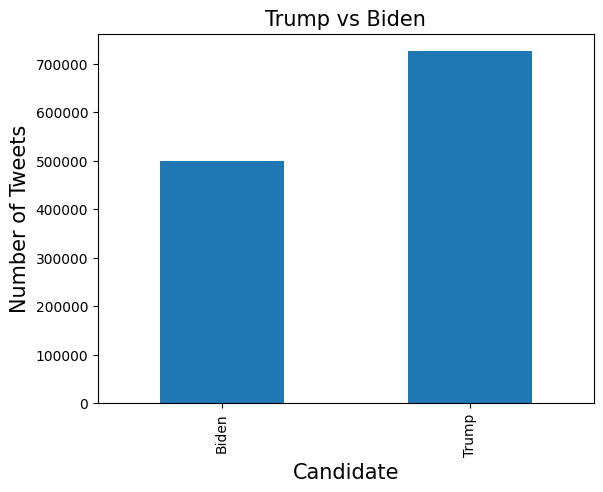

In [8]:
# Check the number of tweets recived for each of them
data_mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.xlabel('Candidate',fontsize=15)
plt.ylabel('Number of Tweets',fontsize=15)
plt.title('Trump vs Biden',fontsize=15)
plt.show()

Trump has recived more tweets than Biden

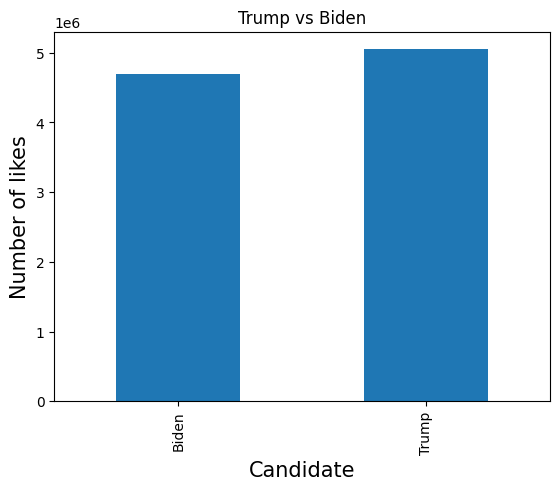

In [9]:
# Comparsion of likes
data_mixed.groupby('Candidate')['likes'].sum().plot.bar()
plt.xlabel('Candidate',fontsize=15)
plt.ylabel('Number of likes',fontsize=15)
plt.title('Trump vs Biden')
plt.show()

Trump has more likes on his tweets

In [10]:
data_mixed['country'].value_counts()

United States of America    262250
United States                50846
United Kingdom               35946
Germany                      23590
France                       22459
                             ...  
Tonga                            2
Turks and Caicos Islands         1
Northern Mariana Islands         1
Antigua and Barbuda              1
Saint Lucia                      1
Name: country, Length: 185, dtype: int64

In [11]:
data_mixed['country'] = data_mixed['country'].replace({"United States of America":"US","United States":"US"})
data_mixed['country'].value_counts()

US                          313096
United Kingdom               35946
Germany                      23590
France                       22459
India                        21891
                             ...  
Vanuatu                          2
Northern Mariana Islands         1
Turks and Caicos Islands         1
Antigua and Barbuda              1
Saint Lucia                      1
Name: country, Length: 184, dtype: int64

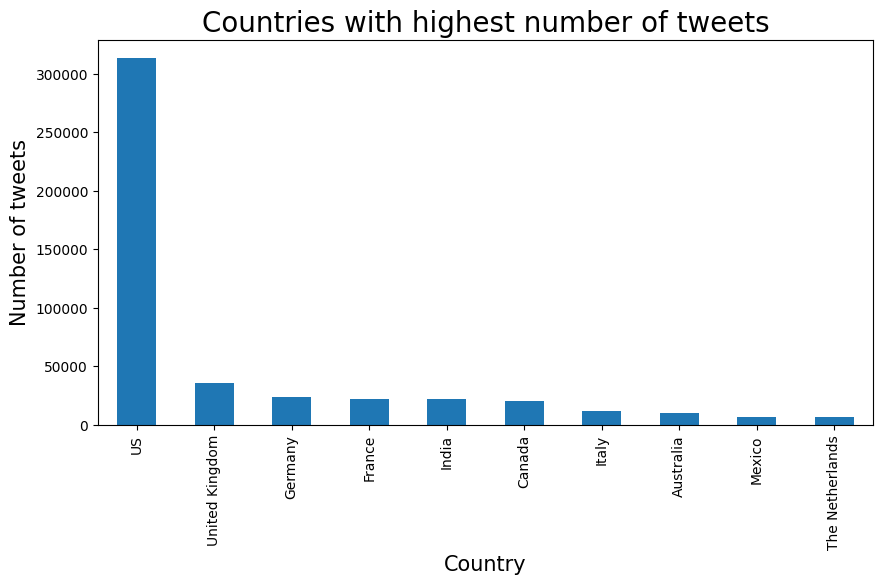

In [12]:
# Countries with the highest number of tweets
plt.figure(figsize=(10,5))
data_mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of tweets',fontsize=15)
plt.title('Countries with highest number of tweets',fontsize=20)
plt.show()

US is the country with the highest number of tweets

In [13]:
# Tweets for both candidates from each country
top10_countries = data_mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
tweet_df = data_mixed.groupby(['country','Candidate'])['tweet'].count().reset_index()
tweet_df = tweet_df[tweet_df['country'].isin(top10_countries)]
tweet_df

,country,Candidate,tweet
15,Australia,Biden,3601
16,Australia,Trump,6691
52,Canada,Biden,7401
53,Canada,Trump,13320
109,France,Biden,8244
110,France,Trump,14215
115,Germany,Biden,7503
116,Germany,Trump,16087
143,India,Biden,9155
144,India,Trump,12736


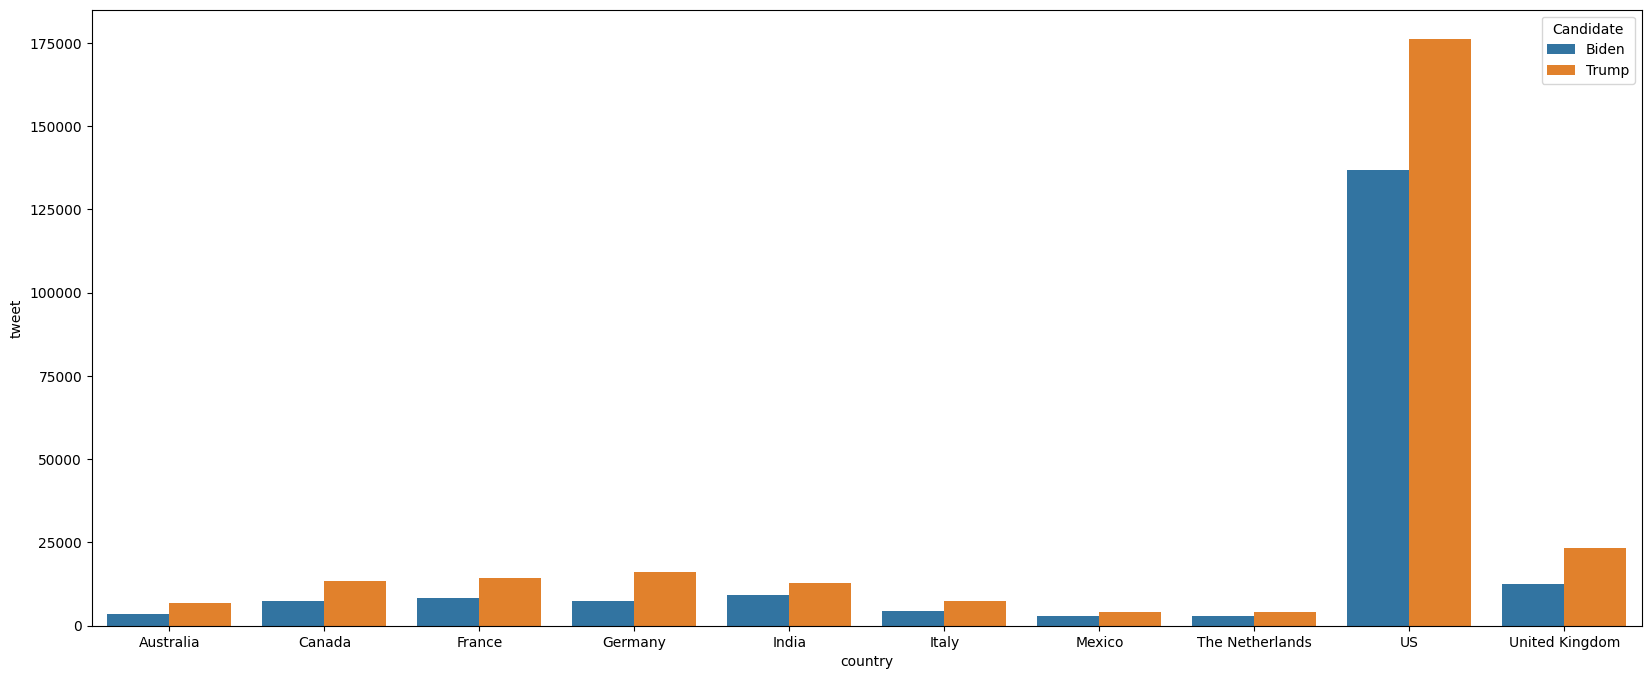

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(data=tweet_df,x='country',y='tweet',hue='Candidate')
plt.show()

In most of the countries, Trump has a upper hand on the amount of tweets recived 

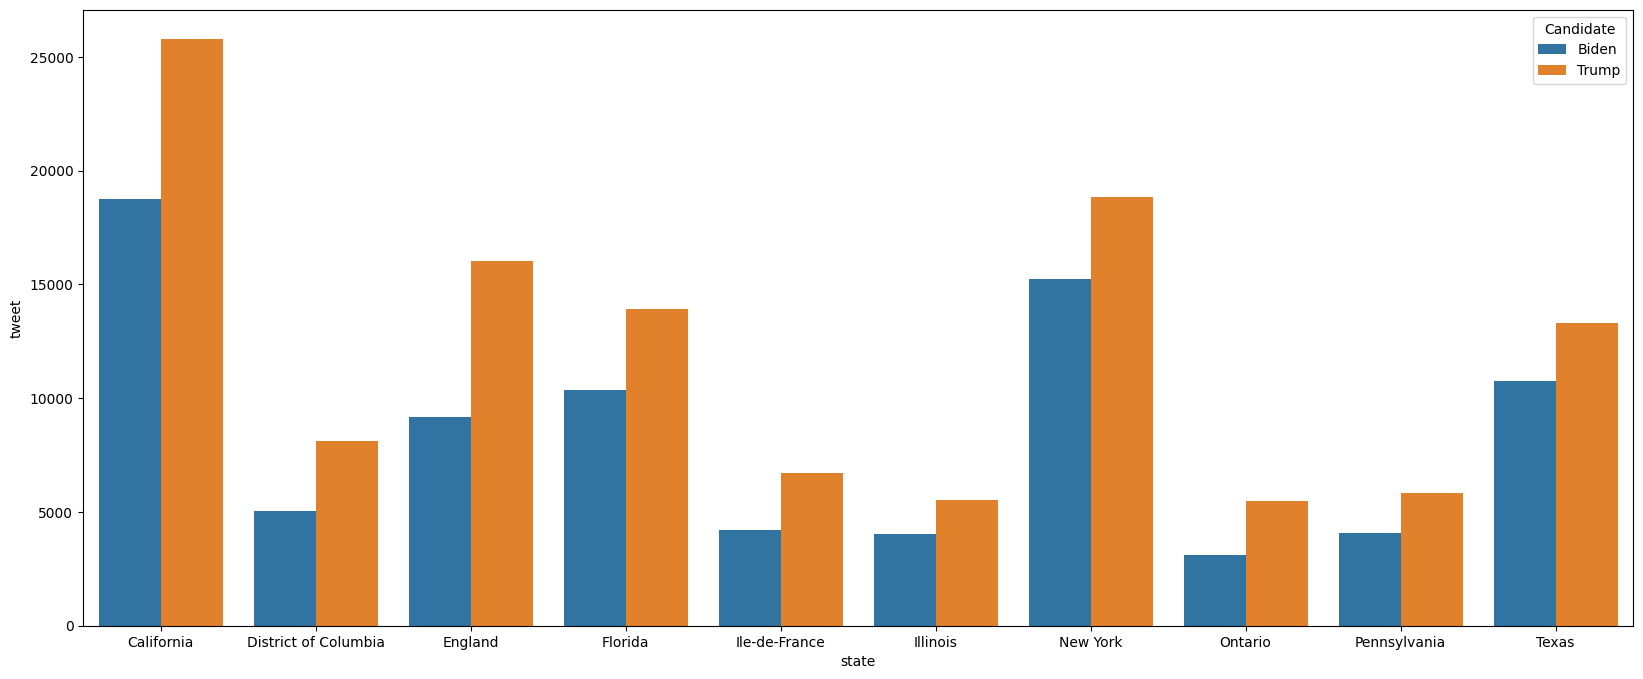

In [15]:
# Tweets for both candidates from each state
top10_states = data_mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
state_df = data_mixed.groupby(['state','Candidate'])['tweet'].count().reset_index()
state_df = state_df[state_df['state'].isin(top10_states)]
state_df

plt.figure(figsize=(20,8))
sns.barplot(data=state_df,x='state',y='tweet',hue='Candidate')
plt.show()

**Sentiment Analysis of Presidential elections**

In [16]:
lm = WordNetLemmatizer()

In [17]:
# Creating a function for cleaning the text
def clean(text):
  text = str(text).lower()
  text = re.sub('[^a-z]',' ',str(text))
  text = text.split()
  text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
  text = ' '.join(str(k) for k in text)
  return text

In [18]:
trump['tweet'][0:1].apply(clean)

0    elecciones en florida joebiden dice que donald...
Name: tweet, dtype: object

Create function to get polarity and subjectivity
1. Polarity - +1: Positive sentiment, 0: Neutral, -1: Negative sentiment
2. Subjectivity - Subjective sentences refer to personal opinions, emotions or people's judgement whereas objective sentence refers to factual information. It ranges from [0,1]

In [19]:
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

**Donald Trump tweets sentiment analysis**

In [20]:
# Taking into account the 'user followers count' since it has more influence
trump_tweets = data_mixed.query('(Candidate == "Trump")').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name'])[['tweet','country']]
trump_tweets = trump_tweets.dropna().loc[trump_tweets.country == 'US']
trump_tweets.reset_index(inplace=True, drop=True)
trump_tweets

,tweet,country
0,"President Donald #Trump’s youngest daughter, T...",US
1,Woah. Have you read this article?\n\nAll the p...,US
2,#SethMeyers lambastes Fox News for parroting #...,US
3,📌 Las #noticias más importantes de la mañana: ...,US
4,#Trump Habla en segundos. Todavía nada está de...,US
...,...,...
37611,"@AOC Sorry, we can't have anything nice anymor...",US
37612,About the #fracking comment last night. Is Jo...,US
37613,The United States shows more DEATHS than other...,US
37614,#iamvalued #youarevaued #msc #Trump #trump2020...,US


In [21]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
trump_tweets

,tweet,country,cleantext,subjectivity,polarity,analysis
0,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...,0.000000,0.00,Neutral
1,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...,0.000000,0.00,Neutral
2,#SethMeyers lambastes Fox News for parroting #...,US,sethmeyers lambastes fox news parroting donald...,0.000000,0.00,Neutral
3,📌 Las #noticias más importantes de la mañana: ...,US,la noticias importantes de la ana sigue el con...,0.000000,0.00,Neutral
4,#Trump Habla en segundos. Todavía nada está de...,US,trump habla en segundos todav nada est definid...,0.000000,0.00,Neutral
...,...,...,...,...,...,...
37611,"@AOC Sorry, we can't have anything nice anymor...",US,aoc sorry anything nice anymore trump,1.000000,0.05,Positive
37612,About the #fracking comment last night. Is Jo...,US,fracking comment last night joe biden bidenhar...,0.066667,0.00,Neutral
37613,The United States shows more DEATHS than other...,US,united state show death country lamestream fak...,0.733333,-0.44,Negative
37614,#iamvalued #youarevaued #msc #Trump #trump2020...,US,iamvalued youarevaued msc trump trump seat sti...,0.000000,0.00,Neutral


In [22]:
trump_tweets['analysis'].value_counts(normalize=True)*100

Neutral     44.778818
Positive    34.692684
Negative    20.528499
Name: analysis, dtype: float64

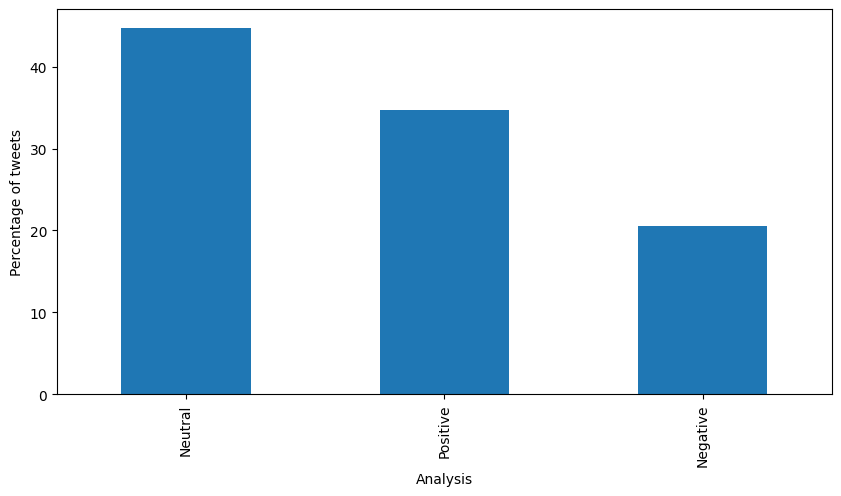

In [23]:
# Plot a graph for analysis of Trump tweets
plt.figure(figsize=(10,5))
(trump_tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.xlabel('Analysis')
plt.ylabel('Percentage of tweets')
plt.show()

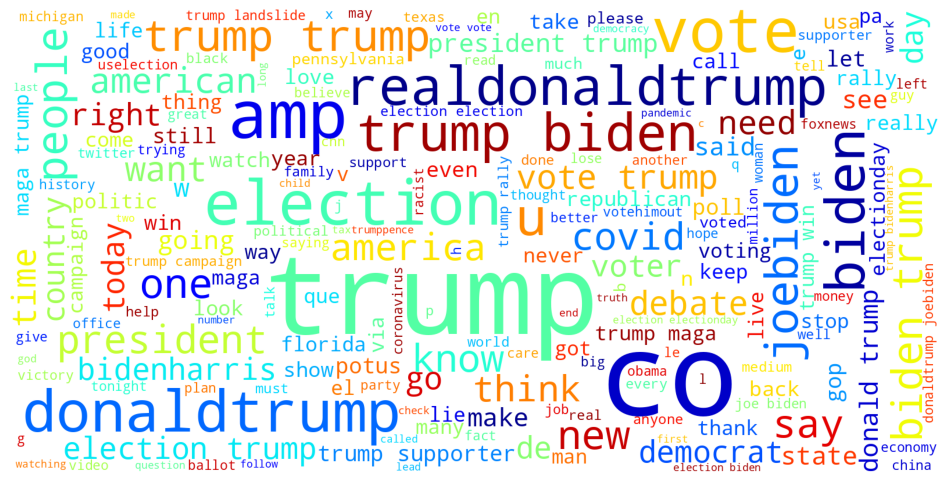

In [24]:
# Creating a Wordcloud
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
  stopwords = set(STOPWORDS)
  all_words = ' '.join([text for text in wd_list])
  wordcloud = WordCloud(background_color='white', 
                        stopwords=stopwords, 
                        width=1600, height=800, 
                        random_state=1,
                        colormap='jet',
                        max_words=200,
                        max_font_size=200).generate(all_words)
  plt.figure(figsize=(12,10))
  plt.axis('off')
  plt.imshow(wordcloud)
word_cloud(trump_tweets['cleantext'][:5000])

**Joe Biden tweets sentiment analysis**

In [25]:
biden_tweets = data_mixed.query('(Candidate == "Biden")').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name'])[['tweet','country']]
biden_tweets = biden_tweets.dropna().loc[biden_tweets.country == 'US']
biden_tweets.reset_index(inplace=True, drop=True)
biden_tweets

,tweet,country
0,#JoeBiden is enlisting A-list star power to he...,US
1,The big fight TODAY!!!!! @realDonaldTrump vs #...,US
2,#JimmyKimmel offered his view about how the la...,US
3,Sigue el conteo de votos en #Georgia: #Trump y...,US
4,"Are you there, God? It's me again, Bette. We'r...",US
...,...,...
40793,@IlanaMercer @RichardBSpencer https://t.co/8PN...,US
40794,"@TheJeffBridges And, I voted for the only hono...",US
40795,#2020ElectionPrediction\n\n#Trump wins 300-320...,US
40796,The world is sick and needs a hero. I think #b...,US


In [26]:
biden_tweets['cleantext'] = biden_tweets['tweet'].apply(clean)
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets


,tweet,country,cleantext,subjectivity,polarity,analysis
0,#JoeBiden is enlisting A-list star power to he...,US,joebiden enlisting list star power help close ...,0.000000,0.000000,Neutral
1,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,big fight today realdonaldtrump v joebiden got...,0.100000,0.000000,Neutral
2,#JimmyKimmel offered his view about how the la...,US,jimmykimmel offered view last day gone close r...,0.066667,0.000000,Neutral
3,Sigue el conteo de votos en #Georgia: #Trump y...,US,sigue el conteo de votos en georgia trump bide...,0.000000,0.000000,Neutral
4,"Are you there, God? It's me again, Bette. We'r...",US,god bette scared fascist whitehouse racist cri...,0.562500,0.100000,Positive
...,...,...,...,...,...,...
40793,@IlanaMercer @RichardBSpencer https://t.co/8PN...,US,ilanamercer richardbspencer http co pnpvyeedn ...,0.000000,0.000000,Neutral
40794,"@TheJeffBridges And, I voted for the only hono...",US,thejeffbridges voted honorable man running pre...,0.000000,0.000000,Neutral
40795,#2020ElectionPrediction\n\n#Trump wins 300-320...,US,electionprediction trump win electoral vote ma...,0.566667,0.733333,Positive
40796,The world is sick and needs a hero. I think #b...,US,world sick need hero think biden way towards s...,0.857143,-0.714286,Negative


In [27]:
biden_tweets['analysis'].value_counts(normalize=True)*100

Neutral     46.801314
Positive    36.965047
Negative    16.233639
Name: analysis, dtype: float64

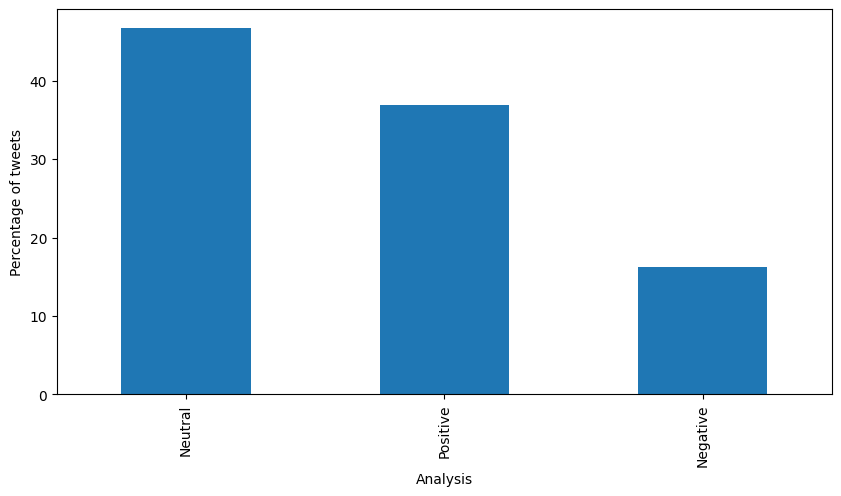

In [28]:
plt.figure(figsize=(10,5))
(biden_tweets['analysis'].value_counts(normalize=True)*100).plot.bar()
plt.xlabel('Analysis')
plt.ylabel('Percentage of tweets')
plt.show()

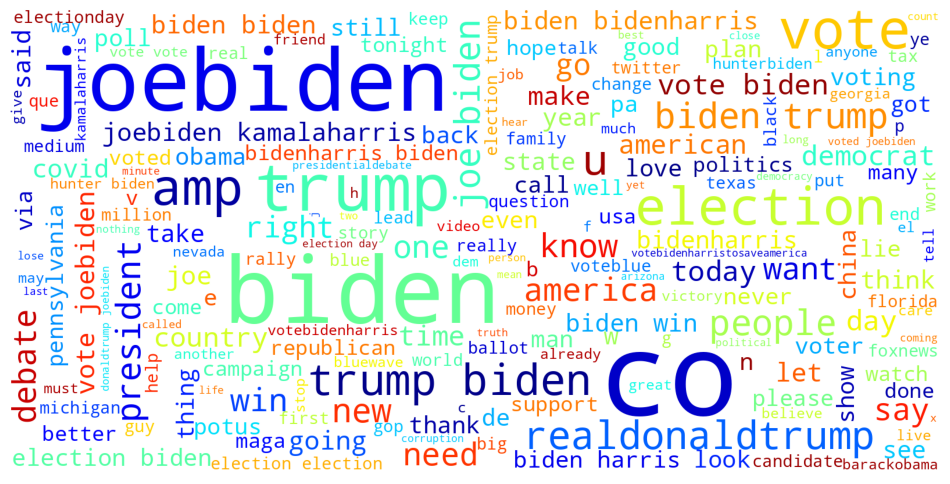

In [29]:
word_cloud(biden_tweets['cleantext'][:5000])

According to Sentiment Analysis, Joe Biden has a upper hand over Donald Trump in US which actually matters in presidential elections.

### **THANKYOU**